In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
import random
 
# hasher = hashlib.md5()
# with open('test.csv', 'rb') as afile:
#     buf = afile.read()
#     hasher.update(buf)
#     print(buf)
# print(hasher.hexdigest())

df = pd.read_csv('survey_results_public.csv')
new_df = df
df = df[df.SocialMedia != "Hello"]
to_drop = ["Respondent", "Country", "MainBranch", "OpenSource", "Employment", "Student", "EdLevel", "UndergradMajor", \
           "EduOther","OrgSize","DevType","YearsCode","Age1stCode","YearsCodePro","CareerSat","JobSat","MgrIdiot",\
           "MgrMoney","MgrWant","JobSeek","LastHireDate","LastInt","FizzBuzz","JobFactors","CurrencySymbol",\
           "CurrencyDesc","CompTotal","CompFreq","ConvertedComp", "WorkWeekHrs","WorkPlan","WorkChallenge",\
           "WorkRemote","WorkLoc","ImpSyn","CodeRev","CodeRevHrs","UnitTests","PurchaseHow","PurchaseWhat",\
          "LanguageWorkedWith","LanguageDesireNextYear","DatabaseWorkedWith","DatabaseDesireNextYear",\
          "PlatformWorkedWith","PlatformDesireNextYear","WebFrameWorkedWith","WebFrameDesireNextYear",\
          "MiscTechWorkedWith","MiscTechDesireNextYear","DevEnviron","OpSys", "Containers","BlockchainOrg",\
          "BlockchainIs","OffOn","ScreenName","SOVisit1st","SOTimeSaved","SOHowMuchTime","WelcomeChange",\
          "Age","Dependents","Ethnicity", "SurveyLength", "SurveyEase"]
df = df.drop(to_drop,axis=1)
df = df.dropna()
print(len(df))
display(df)
print(df.columns)
random.seed()

42938


,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,SONewContent,Gender,Trans,Sexuality
1,No,Less than once per year,"Something else changed (education, award, medi...",Yes,Yes,Instagram,Online,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual
2,Yes,Never,I was preparing for a job search,Yes,Yes,Reddit,In real life (in person),A few times per week,Find answers to specific questions;Learn how t...,6-10 times per week,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Tech meetups or events in your area;Courses on...,Man,No,Straight / Heterosexual
3,No,Never,I was preparing for a job search,Yes,SIGH,Reddit,In real life (in person),Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual
4,Yes,Once a month or more often,I was preparing for a job search,Yes,Also Yes,Facebook,In real life (in person),Multiple times per day,Find answers to specific questions,More than 10 times per week,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, definitely",Tech meetups or events in your area;Courses on...,Man,No,Straight / Heterosexual
5,Yes,Never,I heard about a job opportunity (from a recrui...,No,Yes,YouTube,In real life (in person),A few times per month or weekly,Find answers to specific questions,Less than once per week,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88318,Yes,Less than once per year,"My job status changed (promotion, new job, etc.)",Yes,SIGH,Reddit,In real life (in person),Daily or almost daily,Find answers to specific questions;Learn how t...,6-10 times per week,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not at all",Tech articles written by other developers;Cour...,Man,No,Straight / Heterosexual
88320,Yes,Less than once a month but more than once per ...,I was preparing for a job search,No,Also Yes,YouTube,In real life (in person),Multiple times per day,Find answers to specific questions;Learn how t...,6-10 times per week,Yes,A few times per week,Yes,"No, I've heard of them, but I am not part of a...","Yes, definitely",Tech articles written by other developers;Indu...,Man,No,Gay or Lesbian
88324,Yes,Less than once per year,I heard about a job opportunity (from a recrui...,Yes,Yes,Facebook,Online,A few times per month or weekly,Find answers to specific questions,Less than once per week,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Tech articles written by other developers;Cour...,Man,No,Straight / Heterosexual
88325,Yes,Less than once per year,I was preparing for a job search,Yes,Yes,Twitter,Online,Multiple times per day,Find answers to specific questions;Learn how t...,3-5 times per week,Yes,A few times per week,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual


Index(['Hobbyist', 'OpenSourcer', 'ResumeUpdate', 'BetterLife', 'ITperson',
       'SocialMedia', 'Extraversion', 'SOVisitFreq', 'SOVisitTo',
       'SOFindAnswer', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'SONewContent', 'Gender', 'Trans', 'Sexuality'],
      dtype='object')


In [2]:
def text_to_scores(temp_df, column_name, bins, scores):
    for i in range(len(bins)):
        temp_df.loc[:, column_name] = temp_df.loc[:, column_name].replace(bins[i], scores[i])
    return temp_df

In [3]:
def split_categorical(temp_df, column_name):
    unique_values = temp_df.loc[:, column_name].unique()
    column_index = temp_df.columns.get_indexer_for([column_name])[0]
    print(unique_values)
    for category in unique_values:
        temp_df[category] = temp_df[column_name]
        for i in range(len(temp_df[category])):
            if temp_df.iloc[i, column_index] != category:
                temp_df.iloc[i, column_index] = False
            else:
                temp_df.iloc[i, column_index] = True
    return temp_df

In [4]:
df = split_categorical(df, "ResumeUpdate")

['Something else changed (education, award, media, etc.)'
 'I was preparing for a job search'
 'I heard about a job opportunity (from a recruiter, online job posting, etc.)'
 'My job status changed (promotion, new job, etc.)'
 'I had a negative experience or interaction at work'
 'Re-entry into the workforce']


In [5]:
for i in range(len(df)):
    column_index = df.columns.get_indexer_for(['Something else changed (education, award, media, etc.)'])[0]
    value = df.iloc[i, column_index]
    if value == 'Something else changed (education, award, media, etc.)':
        df.iloc[i, column_index] = True
    else:
        df.iloc[i, column_index] = False

print(display(df.head()))

,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,SONewContent,Gender,Trans,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce
1,No,Less than once per year,False,Yes,Yes,Instagram,Online,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,True,True,False,False,False,False
2,Yes,Never,False,Yes,Yes,Reddit,In real life (in person),A few times per week,Find answers to specific questions;Learn how t...,6-10 times per week,...,Tech meetups or events in your area;Courses on...,Man,No,Straight / Heterosexual,False,False,False,False,False,False
3,No,Never,False,Yes,SIGH,Reddit,In real life (in person),Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,False,False,False,False,False,False
4,Yes,Once a month or more often,False,Yes,Also Yes,Facebook,In real life (in person),Multiple times per day,Find answers to specific questions,More than 10 times per week,...,Tech meetups or events in your area;Courses on...,Man,No,Straight / Heterosexual,False,False,False,False,False,False
5,Yes,Never,False,No,Yes,YouTube,In real life (in person),A few times per month or weekly,Find answers to specific questions,Less than once per week,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,False,False,False,False,False,False


None


In [6]:
soComm_bins = ['No, not at all', 'No, not really', "Neutral", "Not sure", "Yes, somewhat", "Yes, definitely"]
soComm_scores = [-1, -0.5, 0, 0, 0.5, 1]

soFreq_bins =["I have never participated in Q&A on Stack Overflow","Less than once per month or monthly","A few times per month or weekly","A few times per week","Daily or almost daily","Multiple times per day"]
soFreq_scores = [-1, -0.5, 0, 0.5, 1, 1]

soAccount_bins = ['No', "Not sure / can\'t remember'", "Yes"]
soAccount_scores = [-1, 0, 1]

satisfaction_bins = ['Very dissastisfied', "Slightly dissatisfied", 'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Very satisfied']
satisfaction_scores = [-1, -0.5, 0, 0.5, 1]

binary_bins = ["Yes", "No"]
binary_scores = [1, -1]

string_boolean_bins = ['True', 'False']
string_boolean_scores = [1, -1]

boolean_bins = [True, False]
boolean_scores = [1, -1]

opensourcer_bins = ["Never", "Less than once per year", "Less than once a month but more than once per year", "Once a month or more often"]
opensourcer_scores = [-1, -0.5, 0.5, 1]

findAnswer_bins = ["NA", "Less than once per week", "1-2 times per week", "3-5 times per week", "6-10 times per week", "More than 10 times per week"]
findAnswer_scores = [-1, -0.5, 0, 0.5, 1, 1]

soJobs_bins = ["No, I didn't know that Stack Overflow had a job board", "No, I knew that Stack Overflow had a job board but have never used or visited it", "Yes"]
soJobs_scores = [-1, -1, 1]

soTeams_bins = ["No, and I don't know what those are", "No, I've heard of them, but I am not part of a private Q&A instance", "Yes"]
soTeams_scores = [-1, -1, 1]


In [7]:
df = text_to_scores(df, 'SOComm', soComm_bins, soComm_scores)
df = text_to_scores(df, 'SOAccount', soAccount_bins, soAccount_scores)
df = text_to_scores(df, 'SOPartFreq', soFreq_bins, soFreq_scores)
df = text_to_scores(df, 'SOVisitFreq', soFreq_bins, soFreq_scores)
df = text_to_scores(df, 'I was preparing for a job search', boolean_bins, boolean_scores)
df = text_to_scores(df, 'Something else changed (education, award, media, etc.)', boolean_bins, boolean_scores)
df = text_to_scores(df, 'I heard about a job opportunity (from a recruiter, online job posting, etc.)', boolean_bins, boolean_scores)
df = text_to_scores(df, 'My job status changed (promotion, new job, etc.)', boolean_bins, boolean_scores)
df = text_to_scores(df, 'I had a negative experience or interaction at work', boolean_bins, boolean_scores)
df = text_to_scores(df, 'Re-entry into the workforce', boolean_bins, boolean_scores)
df = text_to_scores(df, 'OpenSourcer', opensourcer_bins, opensourcer_scores)
df = text_to_scores(df, 'SOFindAnswer', findAnswer_bins, findAnswer_scores)
df = text_to_scores(df, 'SOJobs', soJobs_bins, soJobs_scores)
df = text_to_scores(df, 'EntTeams', soTeams_bins, soTeams_scores)
df = text_to_scores(df, 'Hobbyist', binary_bins, binary_scores)

In [8]:
display(df)

,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,SONewContent,Gender,Trans,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce
1,-1,-0.5,False,Yes,Yes,Instagram,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,1,1,-1,-1,-1,-1
2,1,-1.0,False,Yes,Yes,Reddit,In real life (in person),0.5,Find answers to specific questions;Learn how t...,1.0,...,Tech meetups or events in your area;Courses on...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1
3,-1,-1.0,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Pass the ti...,0.0,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1
4,1,1.0,False,Yes,Also Yes,Facebook,In real life (in person),1.0,Find answers to specific questions,1.0,...,Tech meetups or events in your area;Courses on...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1
5,1,-1.0,False,No,Yes,YouTube,In real life (in person),0.0,Find answers to specific questions,-0.5,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88318,1,-0.5,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Tech articles written by other developers;Cour...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1
88320,1,0.5,False,No,Also Yes,YouTube,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Tech articles written by other developers;Indu...,Man,No,Gay or Lesbian,-1,-1,-1,-1,-1,-1
88324,1,-0.5,False,Yes,Yes,Facebook,Online,0.0,Find answers to specific questions,-0.5,...,Tech articles written by other developers;Cour...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1
88325,1,-0.5,False,Yes,Yes,Twitter,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1


In [9]:
old_df = df

In [10]:
df = old_df
# df = split_categorical(df, "Extraversion")
df['ExtraversionCol'] = df.loc[:, 'Extraversion']
# to_drop = []
# indexNamesArr = df.index.values
# irl_index = df.columns.get_indexer_for(['ExtraversionCol'])[0]
# for i in range(len(df)):
#     column_val = df.iloc[i, irl_index]
#     if column_val == "Online" or column_val == "In real life (in person)":
#         df.iloc[i, irl_index] = True
#     elif column_val == "Neither":
#         df.iloc[i, irl_index] = False
#     else:
#         to_drop.append(indexNamesArr[i])
# df.drop(labels=to_drop, axis=0)
extraversion_master_bins = ["Online", "In real life (in person)", "Neither"]
extraversion_master_scores = [True, True, False]
df = text_to_scores(df, 'ExtraversionCol', extraversion_master_bins, extraversion_master_scores)
print(len(df))

42938


In [11]:
# indexNamesArr = df.index.values
# irl_index = df.columns.get_indexer_for(['ExtraversionCol'])[0]
# for i in range(len(df)):
display(df)

,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,Gender,Trans,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce,ExtraversionCol
1,-1,-0.5,False,Yes,Yes,Instagram,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Man,No,Straight / Heterosexual,1,1,-1,-1,-1,-1,True
2,1,-1.0,False,Yes,Yes,Reddit,In real life (in person),0.5,Find answers to specific questions;Learn how t...,1.0,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True
3,-1,-1.0,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Pass the ti...,0.0,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True
4,1,1.0,False,Yes,Also Yes,Facebook,In real life (in person),1.0,Find answers to specific questions,1.0,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True
5,1,-1.0,False,No,Yes,YouTube,In real life (in person),0.0,Find answers to specific questions,-0.5,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88318,1,-0.5,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True
88320,1,0.5,False,No,Also Yes,YouTube,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Man,No,Gay or Lesbian,-1,-1,-1,-1,-1,-1,True
88324,1,-0.5,False,Yes,Yes,Facebook,Online,0.0,Find answers to specific questions,-0.5,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True
88325,1,-0.5,False,Yes,Yes,Twitter,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Man,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True


In [12]:
# df = split_categorical(df, "Extraversion")
df['Online'] = df.loc[:, 'Extraversion']
to_drop = []
indexNamesArr = df.index.values
irl_index = df.columns.get_indexer_for(['Online'])[0]
for i in range(len(df)):
    column_val = df.iloc[i, irl_index]
    if column_val == "Online":
        df.iloc[i, irl_index] = True
    elif column_val == "Neither":
        df.iloc[i, irl_index] = False
    elif column_val == "In real life (in person)":
        df.iloc[i, irl_index] = float('nan')
#     else:
#         to_drop.append(indexNamesArr[i])
# df.drop(labels=to_drop, axis=0)
print(len(df))

42938


In [13]:
# df = split_categorical(df, "Extraversion")
df['IRL'] = df.loc[:, 'Extraversion']
to_drop = []
indexNamesArr = df.index.values
irl_index = df.columns.get_indexer_for(['IRL'])[0]
for i in range(len(df)):
    column_val = df.iloc[i, irl_index]
    if column_val == "In real life (in person)":
        df.iloc[i, irl_index] = True
    elif column_val == "Neither":
        df.iloc[i, irl_index] = False
    elif column_val == "Online":
        df.iloc[i, irl_index] = float('nan')
#     else:
#         to_drop.append(indexNamesArr[i])
# df.drop(labels=to_drop, axis=0)
print(len(df))

42938


In [14]:
display(df)

,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce,ExtraversionCol,Online,IRL
1,-1,-0.5,False,Yes,Yes,Instagram,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Straight / Heterosexual,1,1,-1,-1,-1,-1,True,True,NaN
2,1,-1.0,False,Yes,Yes,Reddit,In real life (in person),0.5,Find answers to specific questions;Learn how t...,1.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,NaN,True
3,-1,-1.0,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Pass the ti...,0.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,NaN,True
4,1,1.0,False,Yes,Also Yes,Facebook,In real life (in person),1.0,Find answers to specific questions,1.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,NaN,True
5,1,-1.0,False,No,Yes,YouTube,In real life (in person),0.0,Find answers to specific questions,-0.5,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88318,1,-0.5,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,NaN,True
88320,1,0.5,False,No,Also Yes,YouTube,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Gay or Lesbian,-1,-1,-1,-1,-1,-1,True,NaN,True
88324,1,-0.5,False,Yes,Yes,Facebook,Online,0.0,Find answers to specific questions,-0.5,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,True,NaN
88325,1,-0.5,False,Yes,Yes,Twitter,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,True,True,NaN


In [15]:
df = text_to_scores(df, 'ExtraversionCol', boolean_bins, boolean_scores)
df = text_to_scores(df, 'Online', boolean_bins, boolean_scores)
df = text_to_scores(df, 'IRL', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'In real life (in person)', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'Online', boolean_bins, boolean_scores)

display(df)

,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce,ExtraversionCol,Online,IRL
1,-1,-0.5,False,Yes,Yes,Instagram,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Straight / Heterosexual,1,1,-1,-1,-1,-1,1.0,1.0,NaN
2,1,-1.0,False,Yes,Yes,Reddit,In real life (in person),0.5,Find answers to specific questions;Learn how t...,1.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,NaN,1.0
3,-1,-1.0,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Pass the ti...,0.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,NaN,1.0
4,1,1.0,False,Yes,Also Yes,Facebook,In real life (in person),1.0,Find answers to specific questions,1.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,NaN,1.0
5,1,-1.0,False,No,Yes,YouTube,In real life (in person),0.0,Find answers to specific questions,-0.5,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88318,1,-0.5,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,NaN,1.0
88320,1,0.5,False,No,Also Yes,YouTube,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,Gay or Lesbian,-1,-1,-1,-1,-1,-1,1.0,NaN,1.0
88324,1,-0.5,False,Yes,Yes,Facebook,Online,0.0,Find answers to specific questions,-0.5,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0,NaN
88325,1,-0.5,False,Yes,Yes,Twitter,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0,NaN


In [16]:
online_df = df
online_df = online_df.drop(columns = "IRL")
online_df = online_df.dropna()

irl_df = df
irl_df = irl_df.drop(columns = "Online")
irl_df = irl_df.dropna()

display(online_df)
display(irl_df)

,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,Trans,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce,ExtraversionCol,Online
1,-1,-0.5,False,Yes,Yes,Instagram,Online,1.0,Find answers to specific questions;Learn how t...,0.5,...,No,Straight / Heterosexual,1,1,-1,-1,-1,-1,1.0,1.0
13,1,-0.5,False,Yes,Yes,Reddit,Online,1.0,Find answers to specific questions,0.5,...,No,Straight / Heterosexual,1,1,-1,-1,-1,-1,1.0,1.0
15,1,-1.0,False,No,SIGH,YouTube,Online,1.0,Find answers to specific questions;Learn how t...,-0.5,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
21,1,-0.5,False,Yes,Yes,Instagram,Online,1.0,Find answers to specific questions,0.5,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
23,1,-1.0,False,Yes,Yes,Reddit,Online,1.0,Find answers to specific questions,0.5,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88307,1,-0.5,False,No,Yes,WhatsApp,Neither,1.0,Find answers to specific questions;Learn how t...,1.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,0.0,-1.0
88310,1,-0.5,False,Yes,Yes,WhatsApp,Online,1.0,Find answers to specific questions,1.0,...,No,Bisexual,-1,-1,-1,-1,-1,-1,1.0,1.0
88317,1,-1.0,False,No,Yes,LinkedIn,Online,0.5,Find answers to specific questions,0.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
88324,1,-0.5,False,Yes,Yes,Facebook,Online,0.0,Find answers to specific questions,-0.5,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0


,Hobbyist,OpenSourcer,ResumeUpdate,BetterLife,ITperson,SocialMedia,Extraversion,SOVisitFreq,SOVisitTo,SOFindAnswer,...,Trans,Sexuality,"Something else changed (education, award, media, etc.)",I was preparing for a job search,"I heard about a job opportunity (from a recruiter, online job posting, etc.)","My job status changed (promotion, new job, etc.)",I had a negative experience or interaction at work,Re-entry into the workforce,ExtraversionCol,IRL
2,1,-1.0,False,Yes,Yes,Reddit,In real life (in person),0.5,Find answers to specific questions;Learn how t...,1.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
3,-1,-1.0,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Pass the ti...,0.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
4,1,1.0,False,Yes,Also Yes,Facebook,In real life (in person),1.0,Find answers to specific questions,1.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
5,1,-1.0,False,No,Yes,YouTube,In real life (in person),0.0,Find answers to specific questions,-0.5,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
12,1,0.5,False,Yes,Yes,Twitter,In real life (in person),1.0,Find answers to specific questions,1.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88307,1,-0.5,False,No,Yes,WhatsApp,Neither,1.0,Find answers to specific questions;Learn how t...,1.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,0.0,-1.0
88313,1,-1.0,False,No,Yes,YouTube,In real life (in person),1.0,Find answers to specific questions;Learn how t...,0.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
88318,1,-0.5,False,Yes,SIGH,Reddit,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,No,Straight / Heterosexual,-1,-1,-1,-1,-1,-1,1.0,1.0
88320,1,0.5,False,No,Also Yes,YouTube,In real life (in person),1.0,Find answers to specific questions;Learn how t...,1.0,...,No,Gay or Lesbian,-1,-1,-1,-1,-1,-1,1.0,1.0


In [17]:
import numpy as np

online_df_ten = int(0.1 * len(online_df))
online_df_eighty = int(0.8 * len(online_df))
online_df_ninety = int(0.9 * len(online_df))

split_arrays = np.split(online_df, [online_df_eighty, online_df_ninety])
# split_tens = np.split(split_arrays[1], df_ten)

# df_train = df.iloc[:, :df_eighty]
# df_validation = df.iloc[:, df_eighty:df_ninety]
# df_test = df.iloc[:, df_ninety:]

online_df_train = pd.DataFrame(split_arrays[0])
online_df_validate = pd.DataFrame(split_arrays[1])
online_df_test = pd.DataFrame(split_arrays[2])

print(len(online_df_train))
print(len(online_df_validate))

12856
1607


In [18]:
irl_df_ten = int(0.1 * len(irl_df))
irl_df_eighty = int(0.8 * len(irl_df))
irl_df_ninety = int(0.9 * len(irl_df))

split_arrays_irl = np.split(irl_df, [irl_df_eighty, irl_df_ninety])
# split_tens = np.split(split_arrays[1], df_ten)

# df_train = df.iloc[:, :df_eighty]
# df_validation = df.iloc[:, df_eighty:df_ninety]
# df_test = df.iloc[:, df_ninety:]

irl_df_train = pd.DataFrame(split_arrays_irl[0])
irl_df_validate = pd.DataFrame(split_arrays_irl[1])
irl_df_test = pd.DataFrame(split_arrays_irl[2])

print(len(irl_df_train))
print(len(irl_df_validate))

24544
3068


In [19]:
num_positive = 0
num_negative = 0
filtered_df = pd.DataFrame()
i = 0
indexNamesArr = online_df_train.index.values
column_index = online_df_train.columns.get_indexer_for(['Online'])[0]
while num_positive < 2500 or num_negative < 2500:
    column_val = online_df_train.iloc[i, column_index]
    if column_val == -1 and num_negative < 2500:
        num_negative += 1
        filtered_df = filtered_df.append(online_df_train.loc[indexNamesArr[i], :])
    elif column_val == 1 and num_positive < 2500:
        num_positive += 1
        filtered_df = filtered_df.append(online_df_train.loc[indexNamesArr[i], :])
    i += 1
    
display(filtered_df)
print(i)

,BetterLife,EntTeams,Extraversion,ExtraversionCol,Gender,Hobbyist,I had a negative experience or interaction at work,"I heard about a job opportunity (from a recruiter, online job posting, etc.)",I was preparing for a job search,ITperson,...,SOFindAnswer,SOJobs,SONewContent,SOPartFreq,SOVisitFreq,SOVisitTo,Sexuality,SocialMedia,"Something else changed (education, award, media, etc.)",Trans
1,Yes,-1.0,Online,1.0,Man,-1.0,-1.0,-1.0,1.0,Yes,...,0.5,-1.0,Tech articles written by other developers;Indu...,0.0,1.0,Find answers to specific questions;Learn how t...,Straight / Heterosexual,Instagram,1.0,No
13,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,1.0,Yes,...,0.5,1.0,Tech articles written by other developers;Cour...,-0.5,1.0,Find answers to specific questions,Straight / Heterosexual,Reddit,1.0,No
15,No,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,SIGH,...,-0.5,1.0,Tech articles written by other developers;Indu...,-0.5,1.0,Find answers to specific questions;Learn how t...,Straight / Heterosexual,YouTube,-1.0,No
21,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,0.5,1.0,Tech articles written by other developers;Indu...,0.5,1.0,Find answers to specific questions,Straight / Heterosexual,Instagram,-1.0,No
23,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,0.5,-1.0,Tech articles written by other developers;Indu...,-1.0,1.0,Find answers to specific questions,Straight / Heterosexual,Reddit,-1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57913,No,-1.0,Neither,0.0,Woman,-1.0,-1.0,-1.0,-1.0,Yes,...,1.0,-1.0,Tech articles written by other developers;Indu...,-1.0,1.0,Find answers to specific questions,Straight / Heterosexual,Facebook,-1.0,No
57967,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,-1.0,"Fortunately, someone else has that title",...,1.0,-1.0,Tech articles written by other developers;Tech...,0.0,0.5,Find answers to specific questions;Learn how t...,Straight / Heterosexual,YouTube,-1.0,No
57983,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,1.0,Yes,...,0.0,-1.0,Tech articles written by other developers;Indu...,0.5,0.5,Find answers to specific questions;Learn how t...,Bisexual,WhatsApp,1.0,No
58040,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,1.0,-1.0,Tech articles written by other developers,-0.5,1.0,Find answers to specific questions,Straight / Heterosexual,Instagram,-1.0,No


10601


In [20]:
print(column_index)
print(filtered_df.iloc[1499, column_index])

26
No


In [21]:
display(filtered_df)
print(len(filtered_df))

,BetterLife,EntTeams,Extraversion,ExtraversionCol,Gender,Hobbyist,I had a negative experience or interaction at work,"I heard about a job opportunity (from a recruiter, online job posting, etc.)",I was preparing for a job search,ITperson,...,SOFindAnswer,SOJobs,SONewContent,SOPartFreq,SOVisitFreq,SOVisitTo,Sexuality,SocialMedia,"Something else changed (education, award, media, etc.)",Trans
1,Yes,-1.0,Online,1.0,Man,-1.0,-1.0,-1.0,1.0,Yes,...,0.5,-1.0,Tech articles written by other developers;Indu...,0.0,1.0,Find answers to specific questions;Learn how t...,Straight / Heterosexual,Instagram,1.0,No
13,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,1.0,Yes,...,0.5,1.0,Tech articles written by other developers;Cour...,-0.5,1.0,Find answers to specific questions,Straight / Heterosexual,Reddit,1.0,No
15,No,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,SIGH,...,-0.5,1.0,Tech articles written by other developers;Indu...,-0.5,1.0,Find answers to specific questions;Learn how t...,Straight / Heterosexual,YouTube,-1.0,No
21,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,0.5,1.0,Tech articles written by other developers;Indu...,0.5,1.0,Find answers to specific questions,Straight / Heterosexual,Instagram,-1.0,No
23,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,0.5,-1.0,Tech articles written by other developers;Indu...,-1.0,1.0,Find answers to specific questions,Straight / Heterosexual,Reddit,-1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57913,No,-1.0,Neither,0.0,Woman,-1.0,-1.0,-1.0,-1.0,Yes,...,1.0,-1.0,Tech articles written by other developers;Indu...,-1.0,1.0,Find answers to specific questions,Straight / Heterosexual,Facebook,-1.0,No
57967,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,-1.0,"Fortunately, someone else has that title",...,1.0,-1.0,Tech articles written by other developers;Tech...,0.0,0.5,Find answers to specific questions;Learn how t...,Straight / Heterosexual,YouTube,-1.0,No
57983,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,1.0,Yes,...,0.0,-1.0,Tech articles written by other developers;Indu...,0.5,0.5,Find answers to specific questions;Learn how t...,Bisexual,WhatsApp,1.0,No
58040,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,1.0,-1.0,Tech articles written by other developers,-0.5,1.0,Find answers to specific questions,Straight / Heterosexual,Instagram,-1.0,No


5000


In [22]:
num_positive = 0
num_negative = 0
filtered_df_validate = pd.DataFrame()
i = 0
indexNamesArr = online_df_validate.index.values
column_index = online_df_validate.columns.get_indexer_for(['Online'])[0]
while num_positive < 300 or num_negative < 300:
    column_val = online_df_validate.iloc[i, column_index]
    if column_val == -1 and num_negative < 300:
        num_negative += 1
        filtered_df_validate = filtered_df_validate.append(online_df_validate.loc[indexNamesArr[i], :])
    elif column_val == 1 and num_positive < 300:
        num_positive += 1
        filtered_df_validate = filtered_df_validate.append(online_df_validate.loc[indexNamesArr[i], :])
    i += 1
    
display(filtered_df_validate)
print(i)

,BetterLife,EntTeams,Extraversion,ExtraversionCol,Gender,Hobbyist,I had a negative experience or interaction at work,"I heard about a job opportunity (from a recruiter, online job posting, etc.)",I was preparing for a job search,ITperson,...,SOFindAnswer,SOJobs,SONewContent,SOPartFreq,SOVisitFreq,SOVisitTo,Sexuality,SocialMedia,"Something else changed (education, award, media, etc.)",Trans
70599,Yes,-1.0,Online,1.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,-0.5,1.0,Industry news about technologies you're intere...,0.5,1.0,Find answers to specific questions;Pass the ti...,Straight / Heterosexual,LinkedIn,-1.0,No
70617,No,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,1.0,SIGH,...,1.0,1.0,Tech articles written by other developers;Indu...,0.0,1.0,Find answers to specific questions;Contribute ...,Straight / Heterosexual,WhatsApp,1.0,No
70622,No,-1.0,Online,1.0,Man,-1.0,-1.0,-1.0,-1.0,Yes,...,-0.5,-1.0,Tech articles written by other developers;Indu...,-0.5,1.0,Learn how to do things I didn’t necessarily lo...,Straight / Heterosexual,YouTube,-1.0,No
70628,No,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,-1.0,Yes,...,-0.5,1.0,Tech articles written by other developers;Indu...,-0.5,0.0,Find answers to specific questions;Contribute ...,Straight / Heterosexual,Reddit,-1.0,No
70631,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,1.0,SIGH,...,1.0,-1.0,Tech articles written by other developers;Indu...,-1.0,0.5,Find answers to specific questions;Learn how t...,Straight / Heterosexual,YouTube,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76816,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,1.0,Yes,...,0.0,1.0,Courses on technologies you're interested in,-0.5,1.0,Find answers to specific questions;Contribute ...,Straight / Heterosexual,YouTube,1.0,No
76830,Yes,-1.0,Neither,0.0,Man,-1.0,-1.0,-1.0,-1.0,Also Yes,...,-0.5,-1.0,Tech articles written by other developers;Cour...,-0.5,1.0,Find answers to specific questions;Learn how t...,Straight / Heterosexual,Twitter,-1.0,No
76875,Yes,-1.0,Neither,0.0,Man,1.0,-1.0,-1.0,-1.0,SIGH,...,0.0,1.0,Tech meetups or events in your area;Courses on...,-0.5,0.5,Find answers to specific questions;Learn how t...,Straight / Heterosexual,Facebook,-1.0,No
76895,Yes,1.0,Neither,0.0,Woman;Man,1.0,-1.0,-1.0,-1.0,SIGH,...,1.0,1.0,Tech meetups or events in your area,-1.0,1.0,Find answers to specific questions;Learn how t...,Bisexual,Reddit,-1.0,Yes


1130


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# df = text_to_scores(df, 'SOAccount', soAccount_bins, soAccount_scores)
# df = text_to_scores(df, 'SOPartFreq', soFreq_bins, soFreq_scores)
# df = text_to_scores(df, 'SOVisitFreq', soFreq_bins, soFreq_scores)
# df = text_to_scores(df, 'I was preparing for a job search', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'Something else changed (education, award, media, etc.)', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'I heard about a job opportunity (from a recruiter, online job posting, etc.)', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'My job status changed (promotion, new job, etc.)', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'I had a negative experience or interaction at work', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'Re-entry into the workforce', boolean_bins, boolean_scores)
# df = text_to_scores(df, 'OpenSourcer', opensourcer_bins, opensourcer_scores)
# df = text_to_scores(df, 'SOFindAnswer', findAnswer_bins, findAnswer_scores)
# df = text_to_scores(df, 'SOJobs', soJobs_bins, soJobs_scores)
# df = text_to_scores(df, 'EntTeams', soTeams_bins, soTeams_scores)
# df = text_to_scores(df, 'Hobbyist', binary_bins, binary_scores)

X_features = ["SOAccount", 'SOPartFreq', "SOVisitFreq", "OpenSourcer", "SOFindAnswer", "SOJobs", "EntTeams", "Hobbyist"]
# X_features.append("I was preparing for a job search")
# X_features.append("Something else changed (education, award, media, etc.)")
# X_features.append("I heard about a job opportunity (from a recruiter, online job posting, etc.)")
# X_features.append("I had a negative experience or interaction at work")
# X_features.append("Re-entry into the workforce")

itera = 1000
weight = "balanced"
intercept = True
class_multi = 'auto'
set_c = float(0.01)
start = True

online_model = LogisticRegression(max_iter=itera, class_weight=weight, warm_start=start, fit_intercept=intercept, C=set_c, multi_class=class_multi)
# online_model.fit(filtered_df.loc[:, X_features], filtered_df.loc[:, 'Online'])

online_model.fit(online_df_train.loc[:, X_features], online_df_train.loc[:, 'Online'])

# new_model = LogisticRegression(max_iter=1000)
# new_model.fit(old_df_train.loc[:, X_features], old_df_train.loc[:, 'Online'])

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [24]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0
column_index = filtered_df.columns.get_indexer_for(["Online"])[0]
prediction = online_model.predict(filtered_df.loc[:, X_features])
# print(prediction)
# print(filtered_df.IRL.unique())

for p in range(len(prediction)):
    row_prediction = prediction[p]
    true_value = (filtered_df.iloc[p, column_index])
#     print(str(true_value) + "true vs. " + str(row_prediction))
    if true_value == 1:
        if row_prediction == 1:
            true_positives +=1
        else:
            false_negatives += 1
    else:
        if row_prediction == -1:
            true_negatives += 1
        else:
            false_positives += 1
            
print("True positives: " + str(true_positives))
print("True negatives: " + str(true_negatives))
print("False positives: " + str(false_positives))
print("False negatives: " + str(false_negatives))
print("Total correct: " + str(true_positives+true_negatives))
print("F1-score: " + str(f1_score(filtered_df.loc[:, "Online"], prediction, average='weighted')))

True positives: 1148
True negatives: 1474
False positives: 1026
False negatives: 1352
Total correct: 2622
F1-score: 0.5223695739536599


In [25]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0
column_index = filtered_df_validate.columns.get_indexer_for(["Online"])[0]
prediction = online_model.predict(filtered_df_validate.loc[:, X_features])
# print(prediction)
# print(filtered_df.IRL.unique())

for p in range(len(prediction)):
    row_prediction = int(prediction[p])
    true_value = int(filtered_df_validate.iloc[p, column_index])
#     print(str(true_value) + "true vs. " + str(row_prediction))
    if true_value == 1:
        if row_prediction == true_value:
            true_positives +=1
        else:
            false_negatives += 1
    elif true_value == -1:
        if row_prediction == true_value:
            true_negatives += 1
        else:
            false_positives += 1
            
print("True positives: " + str(true_positives))
print("True negatives: " + str(true_negatives))
print("False positives: " + str(false_positives))
print("False negatives: " + str(false_negatives))
print("F1-score: " + str(f1_score(filtered_df_validate.loc[:, "Online"], prediction, average='weighted')))

True positives: 138
True negatives: 170
False positives: 130
False negatives: 162
F1-score: 0.5119450882510252


In [26]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0
column_index = online_df_train.columns.get_indexer_for(["Online"])[0]
prediction = online_model.predict(online_df_train.loc[:, X_features])
# print(prediction)
# print(filtered_df.IRL.unique())

for p in range(len(prediction)):
    row_prediction = int(prediction[p])
    true_value = int(online_df_train.iloc[p, column_index])
#     print(str(true_value) + "true vs. " + str(row_prediction))
    if true_value == 1:
        if row_prediction == true_value:
            true_positives +=1
        else:
            false_negatives += 1
    else:
        if row_prediction == true_value:
            true_negatives += 1
        else:
            false_positives += 1
            
print("True positives: " + str(true_positives))
print("True negatives: " + str(true_negatives))
print("False positives: " + str(false_positives))
print("False negatives: " + str(false_negatives))
print("F1-score: " + str(f1_score(online_df_train.loc[:, "Online"], prediction, average='weighted')))

True positives: 4633
True negatives: 1795
False positives: 1217
False negatives: 5211
F1-score: 0.5360475522802425


In [27]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0
column_index = online_df_validate.columns.get_indexer_for(["Online"])[0]
prediction = online_model.predict(online_df_validate.loc[:, X_features])
# print(prediction)
# print(filtered_df.IRL.unique())

for p in range(len(prediction)):
    row_prediction = int(prediction[p])
    true_value = int(online_df_train.iloc[p, column_index])
#     print(str(true_value) + "true vs. " + str(row_prediction))
    if true_value == 1:
        if row_prediction == true_value:
            true_positives +=1
        else:
            false_negatives += 1
    else:
        if row_prediction == true_value:
            true_negatives += 1
        else:
            false_positives += 1
            
print("True positives: " + str(true_positives))
print("True negatives: " + str(true_negatives))
print("False positives: " + str(false_positives))
print("False negatives: " + str(false_negatives))
print("F1-score: " + str(f1_score(online_df_validate.loc[:, "Online"], prediction, average='weighted')))

True positives: 598
True negatives: 178
False positives: 152
False negatives: 679
F1-score: 0.5286947617018443


In [28]:
print(online_model.score(filtered_df_validate.loc[:, X_features], filtered_df_validate.loc[:, 'Online']))

0.5133333333333333


In [29]:
prediction = [True] * len(online_df_train)
print(str(f1_score(online_df_train.loc[:, "Online"], prediction, average='weighted')))

0.664112240226542


['SOAccount', 'SOPartFreq', 'SOVisitFreq', 'OpenSourcer', 'SOFindAnswer', 'SOJobs', 'EntTeams', 'Hobbyist']
8
[-1.46292750e-04  2.23636809e-02 -4.30837898e-02  1.55135761e-01
  1.15642923e-01 -2.47596410e-02  6.13639599e-02  1.52485607e-02]


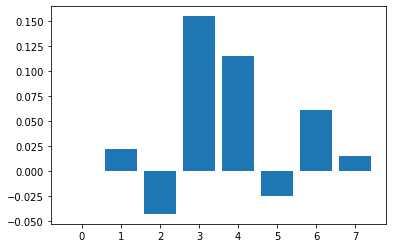

In [44]:
from matplotlib import pyplot as plt
print(X_features)
x_coords = []
for i in range(len(X_features)):
    x_coords.append(i)

weights = online_model.coef_[0]
print(len(weights))
print(weights)
bar_graph = plt.bar(x=x_coords, height=weights)

In [39]:
display(new_df.loc[:, X_features])

,SOAccount,SOPartFreq,SOVisitFreq,OpenSourcer,SOFindAnswer,SOJobs,EntTeams,Hobbyist
0,No,NaN,A few times per month or weekly,Never,3-5 times per week,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Yes
1,Yes,A few times per month or weekly,Daily or almost daily,Less than once per year,3-5 times per week,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",No
2,Yes,Less than once per month or monthly,A few times per week,Never,6-10 times per week,Yes,"No, I've heard of them, but I am not part of a...",Yes
3,Yes,Less than once per month or monthly,Daily or almost daily,Never,1-2 times per week,Yes,"No, and I don't know what those are",No
4,Yes,A few times per month or weekly,Multiple times per day,Once a month or more often,More than 10 times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Yes
...,...,...,...,...,...,...,...,...
88878,Yes,I have never participated in Q&A on Stack Over...,A few times per week,Less than once a month but more than once per ...,3-5 times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Yes
88879,NaN,NaN,NaN,Never,NaN,NaN,NaN,No
88880,NaN,NaN,NaN,Never,NaN,NaN,NaN,No
88881,NaN,NaN,NaN,Never,NaN,NaN,NaN,No


In [40]:
display(df.loc[:, X_features])

,SOAccount,SOPartFreq,SOVisitFreq,OpenSourcer,SOFindAnswer,SOJobs,EntTeams,Hobbyist
1,1,0.0,1.0,-0.5,0.5,-1,-1,-1
2,1,-0.5,0.5,-1.0,1.0,1,-1,1
3,1,-0.5,1.0,-1.0,0.0,1,-1,-1
4,1,0.0,1.0,1.0,1.0,-1,-1,1
5,1,-1.0,0.0,-1.0,-0.5,-1,-1,1
...,...,...,...,...,...,...,...,...
88318,1,-1.0,1.0,-0.5,1.0,-1,-1,1
88320,1,0.5,1.0,0.5,1.0,1,-1,1
88324,1,-1.0,0.0,-0.5,-0.5,-1,-1,1
88325,1,0.5,1.0,-0.5,0.5,1,-1,1


['SOAccount', 'SOPartFreq', 'SOVisitFreq', 'OpenSourcer', 'SOFindAnswer', 'SOJobs', 'EntTeams', 'Hobbyist']
8
[-1.46292750e-04  2.23636809e-02 -4.30837898e-02  1.55135761e-01
  1.15642923e-01 -2.47596410e-02  6.13639599e-02  1.52485607e-02]
[-4.30837898e-02 -2.47596410e-02 -1.46292750e-04  1.52485607e-02
  2.23636809e-02  6.13639599e-02  1.15642923e-01  1.55135761e-01]


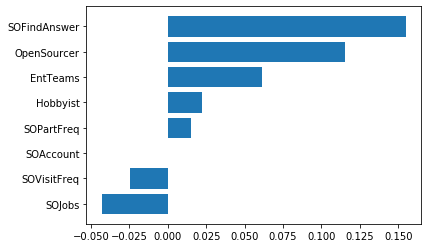

In [45]:
from matplotlib import pyplot as plt
print(X_features)
x_coords = []
for i in range(len(X_features)):
    x_coords.append(i)

weights = online_model.coef_[0]
print(len(weights))
print(weights)
# bar_graph = plt.bar(x=x_coords, height=weights)
weights.sort()
sorted_tags = ['SOJobs', "SOVisitFreq", "SOAccount", "SOPartFreq", "Hobbyist", "EntTeams", "OpenSourcer", "SOFindAnswer"]
print(weights)
bar_graph = plt.barh(y=x_coords, width=weights, tick_label=sorted_tags)